##Librerias

Definimos las librerías en Colab para importar funciones y herramientas que simplifican tareas específicas, lo que ahorra tiempo y esfuerzo al no tener que escribir todo el código desde cero.


In [197]:
#Importamos la librería
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [198]:
# Leer el archivo desde un csv
csv_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vSVKFGEcuRGE8xY-d57JsGQQ9tLg6N5q4ULASEsfnuX07dzmLD8n7bWlqYLd2abmXT0HJYP09npYTFq/pub?output=csv"
df=pd.read_csv(csv_path,sep=",",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Bachelors,2017,Bangalore,3,34,Male,No,0,0
2,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Bachelors,2014,New Delhi,3,38,Female,No,2,0
4,Masters,2016,Bangalore,3,27,Male,No,5,1


In [199]:
#Crear la lista headers
headers=["Education","JoiningYear","City","PaymentTier","Age","Gender","EverBenched","ExperienceInCurrentDomain","LeaveOrNot"]
df.columns=headers
df.head(100)


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Bachelors,2017,Bangalore,3,34,Male,No,0,0
2,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Bachelors,2014,New Delhi,3,38,Female,No,2,0
4,Masters,2016,Bangalore,3,27,Male,No,5,1
...,...,...,...,...,...,...,...,...,...
95,Bachelors,2014,Bangalore,3,39,Male,No,3,1
96,PHD,2018,Bangalore,3,26,Male,No,4,1
97,Bachelors,2016,Bangalore,3,31,Female,No,0,0
98,Bachelors,2014,Bangalore,3,27,Male,No,5,1


In [200]:
#La función dtypes genera una tabla con el tipo de dato de cada columna
df.dtypes

Education                    object
JoiningYear                  object
City                         object
PaymentTier                  object
Age                          object
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain    object
LeaveOrNot                   object
dtype: object

## Limpieza de datos

La limpieza de datos es importante porque garantiza que los datos sean precisos, coherentes y confiables.

In [201]:
# Lista de los nuevos nombres de las columnas
nuevos_nombres = ["Educacion", "AñoIngreso", "Ciudad", "NivelPago", "Edad", "Genero", "AlgunaVezEnLaBanca", "ExpDominioActual","SalirONo"]

# Asigna los nuevos nombres a las columnas
df.columns = nuevos_nombres

#Generamos la tabla para verificar el cambio
df.head(100)

,Educacion,AñoIngreso,Ciudad,NivelPago,Edad,Genero,AlgunaVezEnLaBanca,ExpDominioActual,SalirONo
0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Bachelors,2017,Bangalore,3,34,Male,No,0,0
2,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Bachelors,2014,New Delhi,3,38,Female,No,2,0
4,Masters,2016,Bangalore,3,27,Male,No,5,1
...,...,...,...,...,...,...,...,...,...
95,Bachelors,2014,Bangalore,3,39,Male,No,3,1
96,PHD,2018,Bangalore,3,26,Male,No,4,1
97,Bachelors,2016,Bangalore,3,31,Female,No,0,0
98,Bachelors,2014,Bangalore,3,27,Male,No,5,1


In [202]:
#Identificar y manejar los valores no válidos
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')

#Eliminar las filas con valores no válidos
df.dropna(subset=['Edad'], inplace=True)

In [203]:
#Convertir las columnas con números a int
df['Edad'] = df['Edad'].astype(int)
df['AñoIngreso'] = df['AñoIngreso'].astype(int)
df['NivelPago'] = df['NivelPago'].astype(int)
df['ExpDominioActual'] = df['ExpDominioActual'].astype(int)

# Verifica el tipo de datos después de la conversión
df.dtypes


Educacion             object
AñoIngreso             int64
Ciudad                object
NivelPago              int64
Edad                   int64
Genero                object
AlgunaVezEnLaBanca    object
ExpDominioActual       int64
SalirONo              object
dtype: object

In [204]:
# Reemplazar "1" por "Sí" y "0" por "No" en la columna "SalirONo"
df['SalirONo'] = df['SalirONo'].replace({'1': 'Si', '0': 'No'})

# Reemplazamos "Bachelors" por "Bachiller" y "Masters" por "Maestría" en la columna "Educación"
df['Educacion'] = df['Educacion'].replace({"Bachelors": "Bachiller", "Masters": "Maestria"})

#Remplazamos "Female" por "Femenino" y "Male" por "Masculino" em la columna "Género"
df['Genero'] = df['Genero'].replace({"Female":"Femenino", "Male":"Masculino"})

#Reemplazamos "Yes" por "Si" en la columna "AlgunaVezEnLaBanca"
df['AlgunaVezEnLaBanca'] = df['AlgunaVezEnLaBanca'].replace({"Yes":"Si"})

#Verificamos si los cambios se ejecutaron correctamente
df.head()

,Educacion,AñoIngreso,Ciudad,NivelPago,Edad,Genero,AlgunaVezEnLaBanca,ExpDominioActual,SalirONo
1,Bachiller,2017,Bangalore,3,34,Masculino,No,0,No
2,Bachiller,2013,Pune,1,28,Femenino,No,3,Si
3,Bachiller,2014,New Delhi,3,38,Femenino,No,2,No
4,Maestria,2016,Bangalore,3,27,Masculino,No,5,Si
5,Maestria,2017,Pune,3,24,Masculino,Si,2,Si


In [205]:
# Función para eliminar caracteres especiales
def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

#Eliminamos las filas que tengas carácteres especiales
df['Educacion'] = df['Educacion'].apply(remove_special_characters)
df['Ciudad'] = df['Ciudad'].apply(remove_special_characters)
df['Genero'] = df['Genero'].apply(remove_special_characters)
df['AlgunaVezEnLaBanca'] = df['AlgunaVezEnLaBanca'].apply(remove_special_characters)
df['SalirONo'] = df['SalirONo'].apply(remove_special_characters)

In [206]:
#Eliminamos las filas con valores faltantes
df.dropna(subset=['Educacion'], inplace=True)
df.dropna(subset=['AñoIngreso'], inplace=True)
df.dropna(subset=['Ciudad'], inplace=True)
df.dropna(subset=['NivelPago'], inplace=True)
df.dropna(subset=['Edad'], inplace=True)
df.dropna(subset=['Genero'], inplace=True)
df.dropna(subset=['AlgunaVezEnLaBanca'], inplace=True)
df.dropna(subset=['ExpDominioActual'], inplace=True)
df.dropna(subset=['SalirONo'], inplace=True)

In [207]:
#Calculamos el número de filas nulas en el DataFrame
numero_de_filas_nulas = df.isnull().sum().sum()

#Imprimimos el resuoltado que nos arroja la ejecución del código anterior para verificar
print("Número total de filas nulas:", numero_de_filas_nulas)

Número total de filas nulas: 0


In [208]:
#Verificar el número de filas duplicadas
duplicados = df.duplicated()
print("Número de filas duplicadas:", duplicados.sum())

Número de filas duplicadas: 1889


In [209]:
#verificamos si la columna de edades tiene valores dentro de un rango válido
edades_validas = (df['Edad'] >= 0) & (df['Edad'] <= 100)
print("Valores de edad fuera del rango válido:", (~edades_validas).sum())


Valores de edad fuera del rango válido: 0


In [210]:
#Podemos observar los valores únicos de cada columna
VU = df.nunique()
print("Valores únicos en cada columna:")
print(VU)


Valores únicos en cada columna:
Educacion              3
AñoIngreso             7
Ciudad                 3
NivelPago              3
Edad                  20
Genero                 2
AlgunaVezEnLaBanca     2
ExpDominioActual       8
SalirONo               2
dtype: int64


In [211]:
#Calculamos la mediana de los años de experiencia
mediana_experiencia = df['ExpDominioActual'].median()

#Imprimimos el resultado
print("Mediana de Años de Experiencia:", mediana_experiencia)

Mediana de Años de Experiencia: 3.0


In [212]:
# Contar la cantidad de registros por ciudad
ciudades_counts = df['Ciudad'].value_counts()

#imprimimos la lista de ciudades y asu frecuencia en la data
print("Tendencia de Ciudades:")
print(ciudades_counts)


Tendencia de Ciudades:
Bangalore    2228
Pune         1268
New Delhi    1157
Name: Ciudad, dtype: int64


In [213]:
#Ahora podemos visualizar la data limpia y organizada
df


,Educacion,AñoIngreso,Ciudad,NivelPago,Edad,Genero,AlgunaVezEnLaBanca,ExpDominioActual,SalirONo
1,Bachiller,2017,Bangalore,3,34,Masculino,No,0,No
2,Bachiller,2013,Pune,1,28,Femenino,No,3,Si
3,Bachiller,2014,New Delhi,3,38,Femenino,No,2,No
4,Maestria,2016,Bangalore,3,27,Masculino,No,5,Si
5,Maestria,2017,Pune,3,24,Masculino,Si,2,Si
...,...,...,...,...,...,...,...,...,...
4649,Bachiller,2013,Bangalore,3,26,Femenino,No,4,No
4650,Maestria,2013,Pune,2,37,Masculino,No,2,Si
4651,Maestria,2018,New Delhi,3,27,Masculino,No,5,Si
4652,Bachiller,2012,Bangalore,3,30,Masculino,Si,2,No


In [214]:
# Descargamos la Data en un archivo csv
df.to_csv('Limpieza.csv', index=False)

## Histogramas

En proyectos de limpieza y análisis de datos, los histogramas son una herramienta valiosa para explorar y comprender la estructura y características de los datos, lo que facilita la toma de decisiones y la identificación de problemas en los datos.

<Figure size 500x500 with 0 Axes>

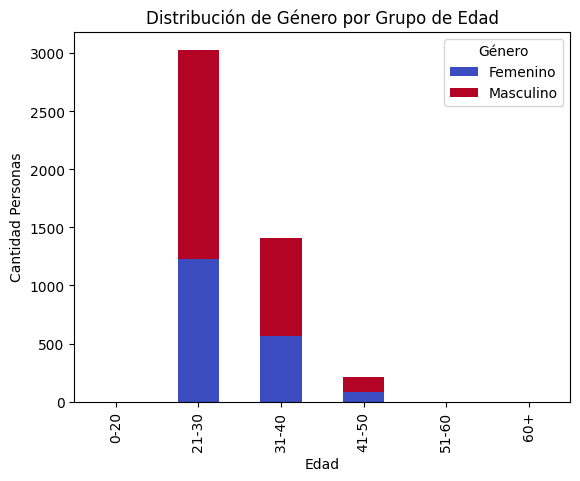

In [216]:
# Define los rangos de edades
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Agrupa las edades en los rangos definidos
df['Grupo de Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

#Contamos la cantidad de personas de cada género en cada grupo de edad
data = df.groupby(['Grupo de Edad', 'Genero']).size().unstack()

#Creamos un gráfico de barras apiladas
plt.figure(figsize=(5, 5))
data.plot(kind='bar', stacked=True, colormap='coolwarm')

#Lo personalizamos
plt.title('Distribución de Género por Grupo de Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad Personas')


#Visualizamos el gráfico
plt.legend(title='Género')
plt.show()


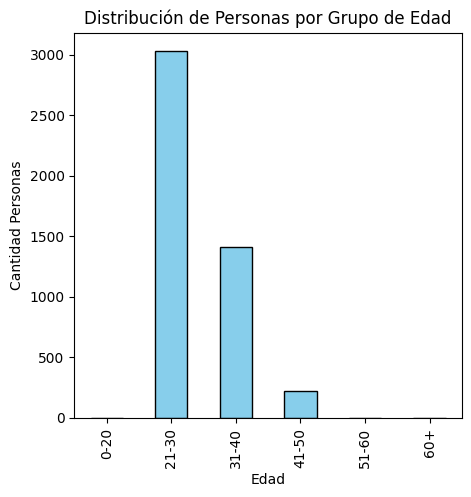

In [217]:
#Definimos los rangos de edades
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Agrupa las edades en los rangos definidos
df['Grupo de Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

#Contamos la cantidad de personas en cada grupo de edad
data = df['Grupo de Edad'].value_counts().sort_index()

#Creamos el gráfico de barras
plt.figure(figsize=(5, 5))
data.plot(kind='bar', color='skyblue', edgecolor='black')

#Lo personalizamos
plt.title('Distribución de Personas por Grupo de Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad Personas')

#Por último lo visualizamos
plt.show()


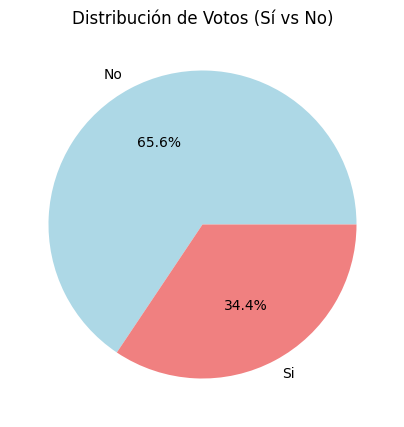

In [218]:
#Contamos la cantidad de votos 'Sí' y 'No' en la columna 'SalirONo'
votos_counts = df['SalirONo'].value_counts()

#Creamos un gráfico de pastel
plt.figure(figsize=(5, 5))
plt.pie(votos_counts, labels=votos_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

#Lo personalizamos
plt.title('Distribución de Votos (Sí vs No)')

#Visualizamos el grafico
plt.show()

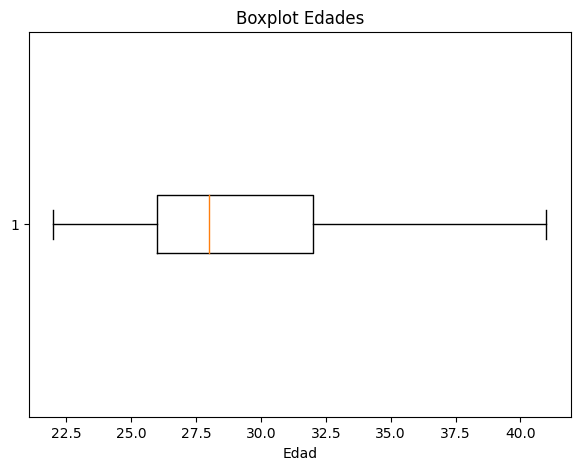

In [219]:
# Crear un boxplot de la edad con su columna correspondiente
plt.figure(figsize=(7, 5))
plt.boxplot(df['Edad'], vert=False)

# Personalizar el gráfico
plt.title('Boxplot Edades')
plt.xlabel('Edad')

# Mostrar el gráfico
plt.show()